In [3]:
import NN
import dataloader
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
# Train Data Load
train_loader = dataloader.Dataloader(r'C:\Users\fist5\Desktop\DGIST Undergradurate course\17. 2023년 가을학기(4학년 1학기)\딥러닝개론\강의 노트\5주차\PA1 - NN & CNN design\3NN', is_train = True, shuffle = True)
x = train_loader.images / 255
x = np.reshape(x, (len(x), 28*28))
y = train_loader.labels
XYset = []
for i in range(len(x)):
    XYset.append([np.reshape(x[i], (28*28, 1)), np.reshape(y[i], (10, 1))])

In [5]:
# Test Data Load
test_loader = dataloader.Dataloader(r'C:\Users\fist5\Desktop\DGIST Undergradurate course\17. 2023년 가을학기(4학년 1학기)\딥러닝개론\강의 노트\5주차\PA1 - NN & CNN design\3NN', is_train = False, shuffle = False)
x_t = test_loader.images / 255
x_t = np.reshape(x_t, (len(x_t), 28*28))
y_t = test_loader.labels
XY_tset = []
for i in range(len(x_t)):
    XY_tset.append([np.reshape(x_t[i], (28*28, 1)), np.reshape(y_t[i], (10, 1))])

In [6]:
# Model Generation
FLNeurons = 500
SLNeurons = 200
learningRate = 1e-4
NN = NN.NN(FLNeurons, SLNeurons, learningRate)

In [7]:
# Traning Parameter Setting
batchSize = 600
maxEpoch = 5
maxIteration = int(len(x)/batchSize*maxEpoch)

In [8]:
# For Plot
Iteration_data = []
TrainingLoss_data = []
TestLoss_data = []

In [9]:
# Start Training
for iteration in range(maxIteration):
    accumulateLoss = 0
    accumulateTestLoss = 0
    sampling_batch = random.sample(XYset, batchSize)
    for step in range(batchSize):
        input = sampling_batch[step][0]
        label = sampling_batch[step][1]
        beforeSoftMax = NN.forward(input)
        afterSoftMax = NN.SoftMax(beforeSoftMax)
        Loss = NN.CrossEntropyLoss(label, afterSoftMax)
        accumulateLoss = accumulateLoss + Loss[0][0]
        output_gradient = NN.dotCrossEntropyLoss(label, afterSoftMax)
        NN.backward(output_gradient)
    print("Iterations ", iteration, "/", maxIteration, " Average Loss: ", accumulateLoss/batchSize)
    Iteration_data.append(iteration)
    TrainingLoss_data.append(accumulateLoss/batchSize)
    NN.update()
    
    # Testing Test Data Set
    testing_batch = random.sample(XY_tset, batchSize)
    for step in range(batchSize):
        testInput = sampling_batch[step][0]
        testLabel = sampling_batch[step][1]
        beforeSoftMax = NN.forward(testInput)
        afterSoftMax = NN.SoftMax(beforeSoftMax)
        Loss = NN.CrossEntropyLoss(testLabel, afterSoftMax)
        accumulateTestLoss = accumulateTestLoss + Loss[0][0]
    TestLoss_data.append(accumulateTestLoss/batchSize)

Iterations  0 / 500  Average Loss:  2.4122695614079896
Iterations  1 / 500  Average Loss:  2.336776852065032
Iterations  2 / 500  Average Loss:  2.2226364724761165
Iterations  3 / 500  Average Loss:  2.1387062921326248
Iterations  4 / 500  Average Loss:  2.0749008901156865
Iterations  5 / 500  Average Loss:  2.019648196795181
Iterations  6 / 500  Average Loss:  1.9572824952539607
Iterations  7 / 500  Average Loss:  1.8948889538813822
Iterations  8 / 500  Average Loss:  1.833810172477639
Iterations  9 / 500  Average Loss:  1.7900644021948224
Iterations  10 / 500  Average Loss:  1.6940955798563502
Iterations  11 / 500  Average Loss:  1.7085871531049985
Iterations  12 / 500  Average Loss:  1.6099541541510882
Iterations  13 / 500  Average Loss:  1.5411048319732075
Iterations  14 / 500  Average Loss:  1.5192005058098779
Iterations  15 / 500  Average Loss:  1.4906089759143188
Iterations  16 / 500  Average Loss:  1.4280530547185644
Iterations  17 / 500  Average Loss:  1.3667293497827218
Itera

Iterations  146 / 500  Average Loss:  0.3802378158097609
Iterations  147 / 500  Average Loss:  0.323028859373568
Iterations  148 / 500  Average Loss:  0.37531760318296037
Iterations  149 / 500  Average Loss:  0.3940561624787786
Iterations  150 / 500  Average Loss:  0.36068451194218826
Iterations  151 / 500  Average Loss:  0.3540771775753281
Iterations  152 / 500  Average Loss:  0.3768937803713543
Iterations  153 / 500  Average Loss:  0.38370427254977346
Iterations  154 / 500  Average Loss:  0.3455559486632433
Iterations  155 / 500  Average Loss:  0.3840355557490133
Iterations  156 / 500  Average Loss:  0.36616476967242767
Iterations  157 / 500  Average Loss:  0.4132538432036199
Iterations  158 / 500  Average Loss:  0.39027328164437236
Iterations  159 / 500  Average Loss:  0.38241260049854203
Iterations  160 / 500  Average Loss:  0.36566672343629486
Iterations  161 / 500  Average Loss:  0.3859986798328685
Iterations  162 / 500  Average Loss:  0.36760302179475857
Iterations  163 / 500  A

Iterations  289 / 500  Average Loss:  0.255866814389262
Iterations  290 / 500  Average Loss:  0.30761609228318393
Iterations  291 / 500  Average Loss:  0.3141920517467762
Iterations  292 / 500  Average Loss:  0.2656126662850862
Iterations  293 / 500  Average Loss:  0.23058134333292415
Iterations  294 / 500  Average Loss:  0.31725966158045127
Iterations  295 / 500  Average Loss:  0.28302817602981034
Iterations  296 / 500  Average Loss:  0.327607086179693
Iterations  297 / 500  Average Loss:  0.33167486091182163
Iterations  298 / 500  Average Loss:  0.35273079610952623
Iterations  299 / 500  Average Loss:  0.29804522194098854
Iterations  300 / 500  Average Loss:  0.3048578539139824
Iterations  301 / 500  Average Loss:  0.30466588337040534
Iterations  302 / 500  Average Loss:  0.2948381115805276
Iterations  303 / 500  Average Loss:  0.24595245078838568
Iterations  304 / 500  Average Loss:  0.33857325983565023
Iterations  305 / 500  Average Loss:  0.3334448282742381
Iterations  306 / 500  

Iterations  432 / 500  Average Loss:  0.24156052111693413
Iterations  433 / 500  Average Loss:  0.2621412546486147
Iterations  434 / 500  Average Loss:  0.20460115901162818
Iterations  435 / 500  Average Loss:  0.21920610623928188
Iterations  436 / 500  Average Loss:  0.24413754719308775
Iterations  437 / 500  Average Loss:  0.26689702100294466
Iterations  438 / 500  Average Loss:  0.27094254609380963
Iterations  439 / 500  Average Loss:  0.2368452570922686
Iterations  440 / 500  Average Loss:  0.2876860946525838
Iterations  441 / 500  Average Loss:  0.28147772475268507
Iterations  442 / 500  Average Loss:  0.26325062791280973
Iterations  443 / 500  Average Loss:  0.2218809355139772
Iterations  444 / 500  Average Loss:  0.21823392965913083
Iterations  445 / 500  Average Loss:  0.24669764478013442
Iterations  446 / 500  Average Loss:  0.27695084957449206
Iterations  447 / 500  Average Loss:  0.2507815734090498
Iterations  448 / 500  Average Loss:  0.24574470482345812
Iterations  449 / 5

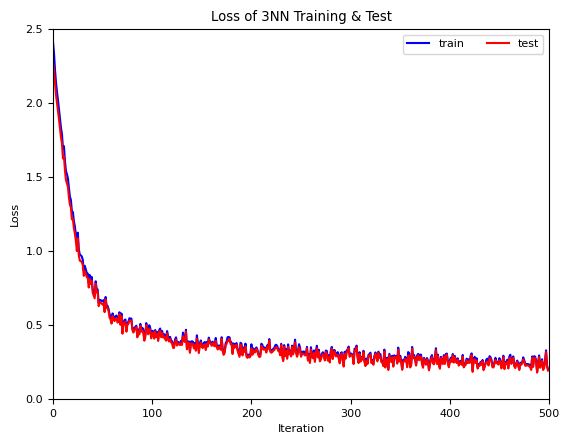

In [49]:
# Loss Graph Plotting    
plt.plot(Iteration_data, TrainingLoss_data, 'b-', label = 'train')
plt.plot(Iteration_data, TestLoss_data, 'r-', label = 'test')
plt.title('Loss of 3NN Training & Test')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.xlim([0, maxIteration])
plt.ylim([0, 2.5])
plt.legend(loc='best', ncol=2) 
#plt.show()
plt.savefig('LossGraph.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)

In [53]:
# Test Data Prediction
predictionDatas = []
predictionCM = []
actualCM = []
top3Datas = {0:[[0,0,0], [0,0,0]], 1:[[0,0,0], [0,0,0]], 2:[[0,0,0], [0,0,0]], 3:[[0,0,0], [0,0,0]], 4:[[0,0,0], [0,0,0]], 5:[[0,0,0], [0,0,0]], 6:[[0,0,0], [0,0,0]], 7:[[0,0,0], [0,0,0]], 8:[[0,0,0], [0,0,0]], 9:[[0,0,0], [0,0,0]]}
for step in range(len(XY_tset)):
    input = XY_tset[step][0]
    label = XY_tset[step][1]
    beforeSoftMax = NN.forward(input)
    probability = NN.SoftMax(beforeSoftMax)
    predictionDatas.append([np.reshape(input, (28,28)), label, probability])
    actualNumber = list(np.transpose(label)[0]).index(1)
    predictionNumber = list(np.transpose(probability)[0]).index(max(list(np.transpose(probability)[0])))
    #Confusion Matrix Preprocessing
    actualCM.append(actualNumber)
    predictionCM.append(predictionNumber)
    #Top3 Data Preprocessing
    minimumProb = min(top3Datas[actualNumber][0])
    if minimumProb < max(np.transpose(probability)[0]):
        renewIndex = top3Datas[actualNumber][0].index(minimumProb)
        top3Datas[actualNumber][0][renewIndex] = max(np.transpose(probability)[0])
        top3Datas[actualNumber][1][renewIndex] = np.reshape(input, (28,28))
        tempA = np.sort(top3Datas[actualNumber][0])
        tempAIndex = np.argsort(top3Datas[actualNumber][0])
        tempB = [top3Datas[actualNumber][1][i] for i in tempAIndex]
        top3Datas[actualNumber][0] = list(tempA)
        top3Datas[actualNumber][1] = list(tempB)

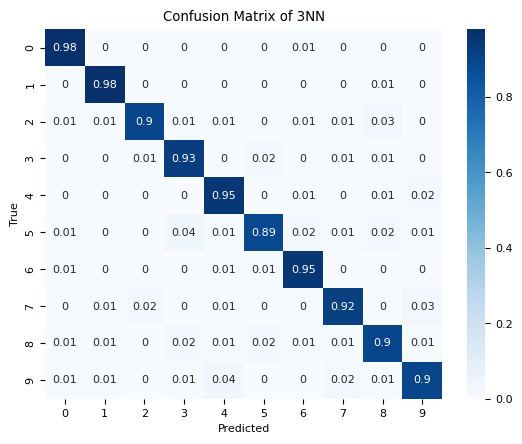

In [54]:
# Confusion Matrix Plot 
cm = np.round(confusion_matrix(actualCM, predictionCM, normalize='true'), 2)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of 3NN')
#plt.show()
plt.savefig('ConfusionMatrix.png', dpi=300)

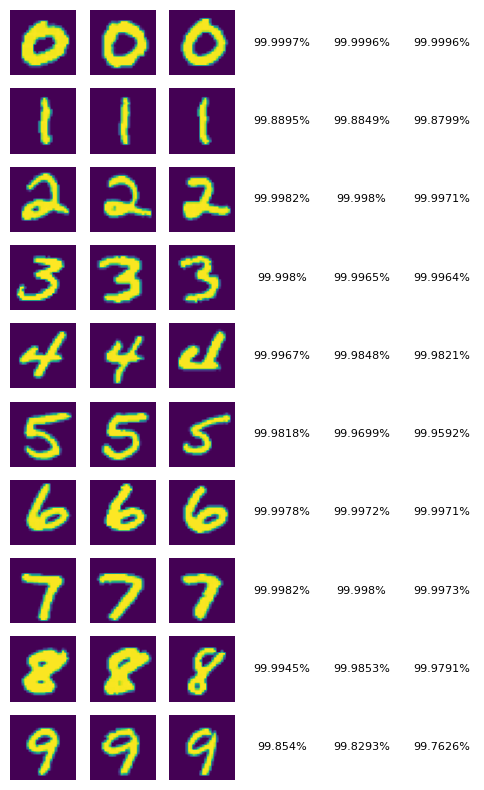

In [55]:
# Top 3 Data Plot
plt.figure(figsize=(6,10))
for i in range(10):
    for j in range(3):
        img = top3Datas[i][1][2-j]
        plt.subplot(10, 6, 6*i+j+1)
        plt.imshow(img)
        plt.axis('off')
    for j in range(3):
        plt.subplot(10, 6, 6*i+j+4)
        plt.rc('font', size=8)
        plt.text(0.5,0.5,str(round(top3Datas[i][0][2-j]*100, 4))+'%', verticalalignment='center' , horizontalalignment='center' )
        plt.axis('off')
#plt.show()
plt.savefig('Top3Datas.png', dpi=300)